# Box Plots
 plot(kind='box')

## Importing and Cleaning Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
data = dataset['train'].to_pandas()
df=data.copy()

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

### DataFrame Data Analyst USA

In [4]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US['salary_year_avg'].sample(10)

12999      90000.0
489389     80250.0
139779     71850.0
754514     90000.0
18741     112500.0
221360     65000.0
340203    111175.0
751279     68944.0
263567     60000.0
22170     169311.0
Name: salary_year_avg, dtype: float64

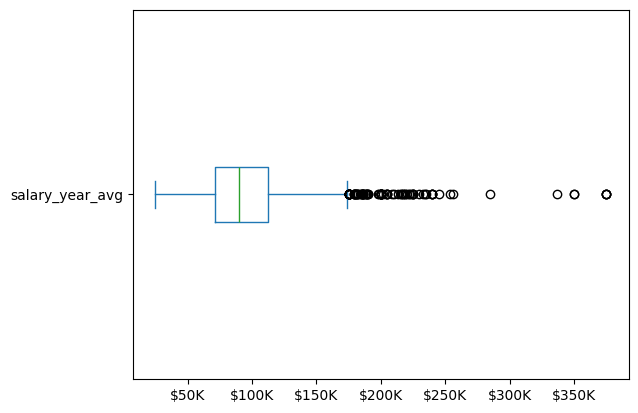

In [11]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"${int(x/1000)}K"))

### DataFrame of USA
Data Analyst
Data Scientist
Data Engineer

In [14]:
job_titles = ['Data Analyst','Data Scientist','Data Engineer']
df_US = df[(df['job_title_short'].isin(job_titles))&(df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')

In [18]:
job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

In [19]:
job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64]

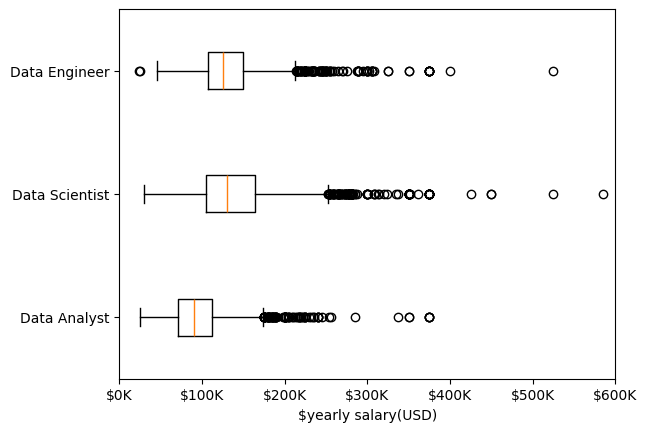

In [24]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"${int(x/1000)}K"))
plt.xlabel('$yearly salary(USD)')
plt.show()